# CO2 prediction model

#### Read in data and imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from math import sqrt
from sklearn.metrics import average_precision_score
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
data =  pd.read_csv("data/cleanedData.csv")

In [ ]:
def get_best_alpha(model,X,y,alphas):
    kf = KFold(n_splits=3, random_state = 0, shuffle=False)
    results = []
    for alpha in alphas:
        model.set_params(alpha=alpha)
        for train_indexes, test_indexes in kf.split(X):
            X_test, X_val = X.values[train_indexes], X.values[test_indexes]
            y_test, y_val = y.values[train_indexes], y.values[test_indexes]

            model.fit(X_test, y_test)
            mse = mean_squared_error(y_val,model.predict(X_val))
            results.append((alpha, mse))
   

    best_alpha, mse = sorted(results, key=lambda x: x[1])[0]
    return best_alpha, mse

#### Need to remove vehicles without CO2 emissions listed

In [3]:
df_NoCO2 = data[data.CO2.isna()]
df_CO2 = data[data.CO2.notnull()]

#### Make all features numeric

In [5]:
y = df_CO2['CO2']
X = df_CO2.drop(columns=['CO2'])

for (columnName, columnData) in X.iteritems():
    print('Colunm Name : ', columnName)
    uniqueValues = X[columnName].unique()
    print(uniqueValues)
    if ((X[columnName].dtypes == 'object')):
        v = 1
        for value in uniqueValues:
            X.loc[(X[columnName] == value), columnName] = v
            v += 1
        X[columnName] = X[columnName].fillna(0)

for (columnName, columnData) in X.iteritems():
    print('Colunm Name : ', columnName)
    print(X[columnName].unique())
    
#X = pd.get_dummies(X)

Colunm Name :  Üldine staatus
['REGISTREERITUD' 'PEATATUD']
Colunm Name :  Kategooria
['M1' 'M1G']
Colunm Name :  Mark
['ALFA ROMEO' 'ALPINA' 'ALPINE' 'AMG HUMMER' 'ASTON MARTIN' 'AUDI'
 'BENTLEY' 'BMW' 'BUICK' 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'CITROEN'
 'DACIA' 'DAEWOO' 'DAIHATSU' 'DODGE' 'DONKERVOORT' 'DR MOTOR' 'DS'
 'FERRARI' 'FIAT' 'FISKER' 'FORD' 'GMC' 'HONDA' 'HYUNDAI' 'INFINITI'
 'ISUZU' 'IVECO' 'JAGUAR' 'JEEP' 'KIA' 'LADA' 'LAMBORGHINI' 'LANCIA'
 'LAND ROVER' 'LES DAUPHINS' 'LEXUS' 'LINCOLN' 'LOTUS' 'MAN' 'MASERATI'
 'MAZDA' 'MCC' 'MCLAREN' 'MERCEDES-BENZ' 'MG' 'MINI' 'MITSUBISHI' 'MORGAN'
 'NISSAN' 'OPEL' 'PEUGEOT' 'PLYMOUTH' 'PONTIAC' 'PORSCHE' 'RENAULT'
 'ROLLS-ROYCE' 'ROVER' 'SAAB' 'SEAT' 'SHUANGHUAN' 'ŠKODA' 'SMART'
 'SSANGYONG' 'SUBARU' 'SUZUKI' 'TOYOTA' 'VAZ' 'VAUXHALL' 'VOLKSWAGEN'
 'VOLVO']
Colunm Name :  Mudel
['145' '146' '147' ... 'XC90' 'XC90 T8 TWIN ENGINE'
 'NILSSON V70 AMBULANCE']
Colunm Name :  Keretüüp
['LUUKPÄRA' 'SEDAAN' 'UNIVERSAAL' 'LAHTINE' 'KUPEE' 'MAH

#### Split the data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regressors

#### Linear Regression

LinearRegression MSRE: 17.983926778097587


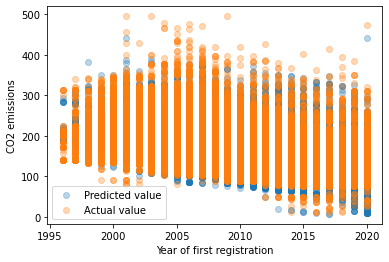

Üldine staatus coefficient: 1.5022127997176844
Kategooria coefficient: 12.635263438280843
Mark coefficient: -0.19492253923255098
Mudel coefficient: 0.007229411864185479
Keretüüp coefficient: 1.4205927062796402
Esm reg aasta coefficient: -3.7030264281127
Värv coefficient: 0.05471613835612219
Mootori tüüp coefficient: -22.466474617050075
Mootori maht coefficient: 0.024940022414884577
Mootori võimsus coefficient: 0.010033049607092623
Tühimass coefficient: 0.05336504009924912
Käigukasti tüüp coefficient: 1.8416570638356138
Telgi kokku coefficient: -1.0658141036401503e-14
Maakond coefficient: -0.03769371105952954
Linn coefficient: 0.017976456103185132


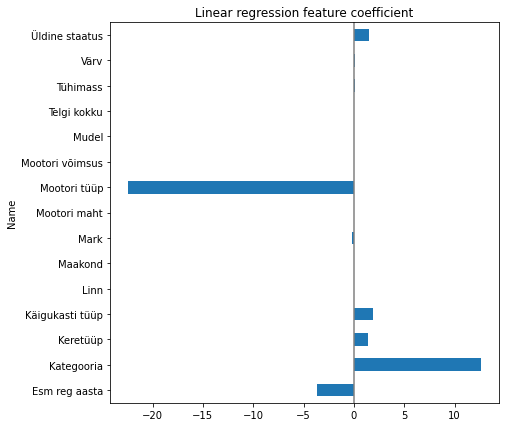

In [7]:
lr = LinearRegression().fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print("LinearRegression MSRE:",mean_squared_error(y_test, lr_pred, squared=False))
plt.scatter(X_test['Esm reg aasta'], lr_pred, marker='o', alpha=0.3);
plt.scatter(X_test['Esm reg aasta'], y_test, marker='o', alpha=0.3);
plt.legend({'Actual value','Predicted value'})
plt.xlabel("Year of first registration")
plt.ylabel("CO2 emissions")
plt.show()

for i in range(len(lr.coef_)):
    print(X.columns[i] + " coefficient:", lr.coef_[i])
    
coef_df = pd.DataFrame({'Name':X.columns, 'coefficient':lr.coef_})

coef_df.groupby("Name")['coefficient'].mean().plot(kind='barh', figsize=(9, 7))
plt.title('Linear regression feature coefficient')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

#### Ridge regression

Ridge MSRE: 17.98392673284698


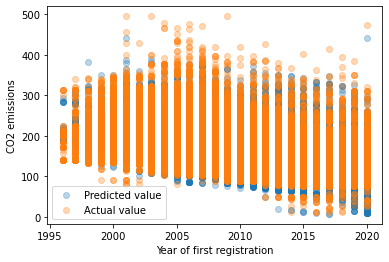

Üldine staatus coefficient: 1.5020640139624648
Kategooria coefficient: 12.63462744135743
Mark coefficient: -0.19492536692201215
Mudel coefficient: 0.007229521216376067
Keretüüp coefficient: 1.4205767511507044
Esm reg aasta coefficient: -3.7030332741925123
Värv coefficient: 0.05471737299747601
Mootori tüüp coefficient: -22.46629744029297
Mootori maht coefficient: 0.024939920786642023
Mootori võimsus coefficient: 0.010034700807557447
Tühimass coefficient: 0.05336525847486538
Käigukasti tüüp coefficient: 1.841628710300109
Telgi kokku coefficient: 0.0
Maakond coefficient: -0.0376953083199975
Linn coefficient: 0.01797660475569191


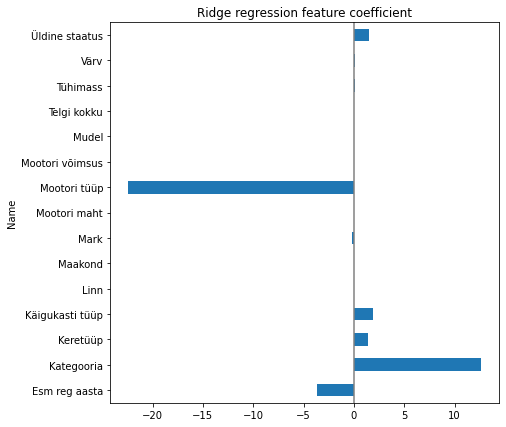

In [8]:
ridge = Ridge().fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
print("Ridge MSRE:",mean_squared_error(y_test, ridge_pred, squared=False))
plt.scatter(X_test['Esm reg aasta'], ridge_pred, marker='o', alpha=0.3);
plt.scatter(X_test['Esm reg aasta'], y_test, marker='o', alpha=0.3);
plt.legend({'Actual value','Predicted value'})
plt.xlabel("Year of first registration")
plt.ylabel("CO2 emissions")
plt.show()

for i in range(len(ridge.coef_)):
    print(X.columns[i] + " coefficient:", ridge.coef_[i])
    
coef_df = pd.DataFrame({'Name':X.columns, 'coefficient':ridge.coef_})

coef_df.groupby("Name")['coefficient'].mean().plot(kind='barh', figsize=(9, 7))
plt.title('Ridge regression feature coefficient')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

#### Lasso regression

Lasso MSRE: 18.384037940826516


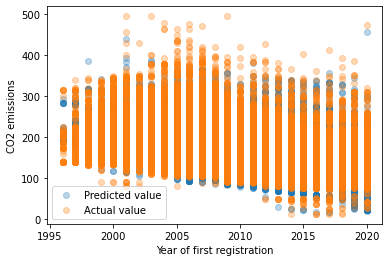

Üldine staatus coefficient: 0.0
Kategooria coefficient: 0.0
Mark coefficient: -0.17021167107250965
Mudel coefficient: 0.006727690299492116
Keretüüp coefficient: 0.6208341229304415
Esm reg aasta coefficient: -3.6719939298088757
Värv coefficient: 0.04122467448955327
Mootori tüüp coefficient: -20.085961955108868
Mootori maht coefficient: 0.024605948667456093
Mootori võimsus coefficient: 0.017489898303129473
Tühimass coefficient: 0.060286913749900646
Käigukasti tüüp coefficient: 0.0
Telgi kokku coefficient: 0.0
Maakond coefficient: -0.014980492408259872
Linn coefficient: 0.0


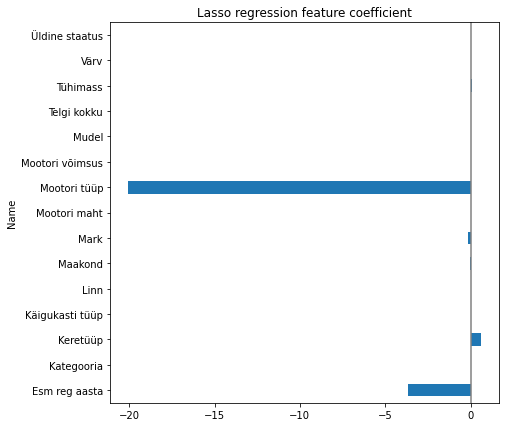

In [9]:
lasso = Lasso().fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
print("Lasso MSRE:",mean_squared_error(y_test, lasso_pred, squared=False))
plt.scatter(X_test['Esm reg aasta'], lasso_pred, marker='o', alpha=0.3);
plt.scatter(X_test['Esm reg aasta'], y_test, marker='o', alpha=0.3);
plt.legend({'Actual value','Predicted value'})
plt.xlabel("Year of first registration")
plt.ylabel("CO2 emissions")
plt.show()

for i in range(len(lasso.coef_)):
    print(X.columns[i] + " coefficient:", lasso.coef_[i])
    
coef_df = pd.DataFrame({'Name':X.columns, 'coefficient':lasso.coef_})

coef_df.groupby("Name")['coefficient'].mean().plot(kind='barh', figsize=(9, 7))
plt.title('Lasso regression feature coefficient')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

#### Decision Tree Regressor

Decision Tree MSRE: 5.190588787930889


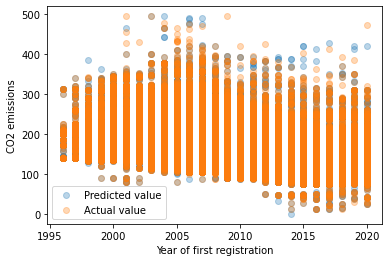

Üldine staatus coefficient: 7.367128189415989e-05
Kategooria coefficient: 0.007641721014022063
Mark coefficient: 0.0068909965792110185
Mudel coefficient: 0.022899486686453693
Keretüüp coefficient: 0.013182310788987517
Esm reg aasta coefficient: 0.183214914019299
Värv coefficient: 0.0009804735809539225
Mootori tüüp coefficient: 0.07816137727789252
Mootori maht coefficient: 0.5057195911185921
Mootori võimsus coefficient: 0.064243513577521
Tühimass coefficient: 0.10330296698279182
Käigukasti tüüp coefficient: 0.012511527210194271
Telgi kokku coefficient: 0.0
Maakond coefficient: 0.0006813484490134101
Linn coefficient: 0.0004961014331733466


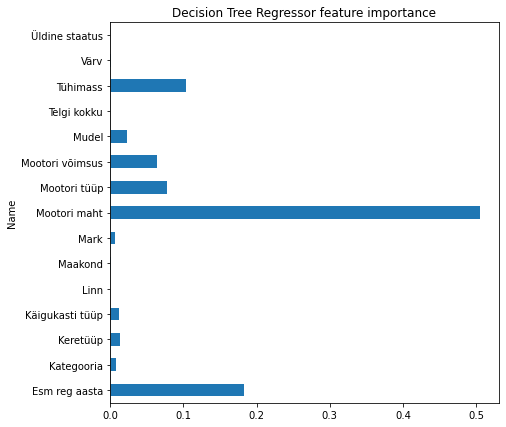

In [10]:
decisionTree = DecisionTreeRegressor(random_state=0).fit(X_train, y_train)
decisionTree_pred = decisionTree.predict(X_test)
print("Decision Tree MSRE:",mean_squared_error(y_test, decisionTree_pred, squared=False))
plt.scatter(X_test['Esm reg aasta'], decisionTree_pred, marker='o', alpha=0.3);
plt.scatter(X_test['Esm reg aasta'], y_test, marker='o', alpha=0.3);
plt.legend({'Actual value','Predicted value'})
plt.xlabel("Year of first registration")
plt.ylabel("CO2 emissions")
plt.show()

for i in range(len(decisionTree.feature_importances_)):
    print(X.columns[i] + " coefficient:", decisionTree.feature_importances_[i])
    
importance_df = pd.DataFrame({'Name':X.columns, 'importance':decisionTree.feature_importances_})
importance_df.groupby("Name")['importance'].mean().plot(kind='barh', figsize=(9, 7))
plt.title('Decision Tree Regressor feature importance')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

#### Random Forest Regressor

Random Forest MSRE: 3.9741193935714865


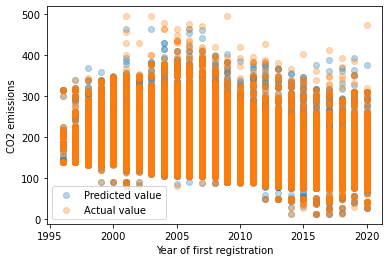

Üldine staatus importance: 8.857148863991896e-05
Kategooria importance: 0.0072469508681180655
Mark importance: 0.007561301024565551
Mudel importance: 0.021210461978547288
Keretüüp importance: 0.013063990211056522
Esm reg aasta importance: 0.18362542322100997
Värv importance: 0.001001664552099623
Mootori tüüp importance: 0.08499482931709017
Mootori maht importance: 0.4971795780225133
Mootori võimsus importance: 0.06292981849724091
Tühimass importance: 0.10702468099228273
Käigukasti tüüp importance: 0.012745209555275222
Telgi kokku importance: 0.0
Maakond importance: 0.000755652326131037
Linn importance: 0.0005718679454295514


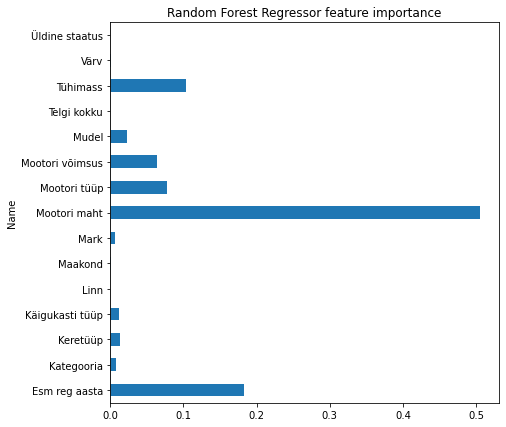

In [11]:
randomForest = RandomForestRegressor(random_state=0).fit(X_train, y_train)
randomForest_pred = randomForest.predict(X_test)
print("Random Forest MSRE:",mean_squared_error(y_test, randomForest_pred, squared=False))
plt.scatter(X_test['Esm reg aasta'], randomForest_pred, marker='o', alpha=0.3);
plt.scatter(X_test['Esm reg aasta'], y_test, marker='o', alpha=0.3);
plt.legend({'Actual value','Predicted value'})
plt.xlabel("Year of first registration")
plt.ylabel("CO2 emissions")
plt.show()

for i in range(len(randomForest.feature_importances_)):
    print(X.columns[i] + " importance:", randomForest.feature_importances_[i])
    
importance_df = pd.DataFrame({'Name':X.columns, 'importance':decisionTree.feature_importances_})

importance_df.groupby("Name")['importance'].mean().plot(kind='barh', figsize=(9, 7))
plt.title('Random Forest Regressor feature importance')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

#### Logistic Regressor

logisticRegression = LogisticRegression(random_state=0).fit(X_train, y_train)
logisticRegression_pred = logisticRegression.predict(X_test)
print("Logistic Regression MSRE:",mean_squared_error(y_test, logisticRegression_pred, squared=False))
plt.scatter(X_test['Esm reg aasta'], logisticRegression_pred, marker='o', alpha=0.3);
plt.scatter(X_test['Esm reg aasta'], y_test, marker='o', alpha=0.3);
plt.legend({'Actual value','Predicted value'})
plt.xlabel("Year of first registration")
plt.ylabel("CO2 emissions")
plt.show()

for i in range(len(logisticRegression.feature_importances)):
    print(X.columns[i] + " coefficient:", logisticRegression.feature_importances[i])

#### Gradient Boosting Regressor

Gradient Boosting Regressor MSRE: 12.625566392697927


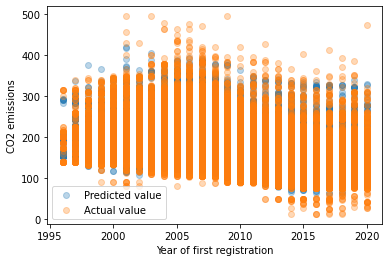

Üldine staatus coefficient: 7.688228611872908e-05
Kategooria coefficient: 0.010359991522700146
Mark coefficient: 0.004365247619343048
Mudel coefficient: 0.005422495028271693
Keretüüp coefficient: 0.007866380627704233
Esm reg aasta coefficient: 0.22749279826394386
Värv coefficient: 2.9785061135551527e-05
Mootori tüüp coefficient: 0.09231112313984188
Mootori maht coefficient: 0.4876555581650878
Mootori võimsus coefficient: 0.030014823394064513
Tühimass coefficient: 0.12310575619546882
Käigukasti tüüp coefficient: 0.011299089503595025
Telgi kokku coefficient: 0.0
Maakond coefficient: 0.0
Linn coefficient: 6.919272469830317e-08


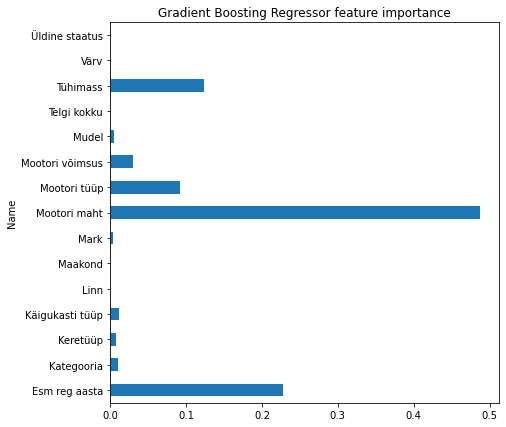

In [12]:
gradientBoostingReg = GradientBoostingRegressor(random_state=0).fit(X_train, y_train)
gradientBoostingReg_pred = gradientBoostingReg.predict(X_test)
print("Gradient Boosting Regressor MSRE:",mean_squared_error(y_test, gradientBoostingReg_pred, squared=False))
plt.scatter(X_test['Esm reg aasta'], gradientBoostingReg_pred, marker='o', alpha=0.3);
plt.scatter(X_test['Esm reg aasta'], y_test, marker='o', alpha=0.3);
plt.legend({'Actual value','Predicted value'})
plt.xlabel("Year of first registration")
plt.ylabel("CO2 emissions")
plt.show()

for i in range(len(gradientBoostingReg.feature_importances_)):
    print(X.columns[i] + " coefficient:", gradientBoostingReg.feature_importances_[i])
    
importance_df = pd.DataFrame({'Name':X.columns, 'importance':gradientBoostingReg.feature_importances_})

importance_df.groupby("Name")['importance'].mean().plot(kind='barh', figsize=(9, 7))
plt.title('Gradient Boosting Regressor feature importance')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

#### Voting Regressor

Voting Regressor MSRE: 5.702841302102349


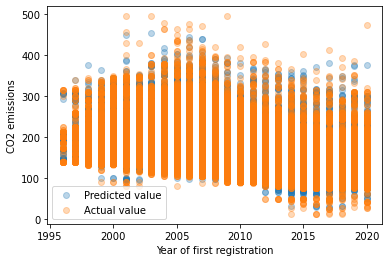

In [13]:
votingReg = VotingRegressor(estimators=[('gb', gradientBoostingReg), ('rf', randomForest), ('des', decisionTree)]).fit(X_train, y_train)
votingReg_pred = votingReg.predict(X_test)
print("Voting Regressor MSRE:",mean_squared_error(y_test, votingReg_pred, squared=False))
plt.scatter(X_test['Esm reg aasta'], votingReg_pred, marker='o', alpha=0.3);
plt.scatter(X_test['Esm reg aasta'], y_test, marker='o', alpha=0.3);
plt.legend({'Actual value','Predicted value'})
plt.xlabel("Year of first registration")
plt.ylabel("CO2 emissions")
plt.show()

#### SVR (Epsilon-Support Vector Regression)

svr = SVR().fit(X_train, y_train)
svr_pred = svr.predict(X_test)
print("SVR MSRE:",mean_squared_error(y_test, svr_pred, squared=False))
plt.scatter(X_test['Esm reg aasta'], svr_pred, marker='o', alpha=0.3);
plt.scatter(X_test['Esm reg aasta'], y_test, marker='o', alpha=0.3);
plt.legend({'Actual value','Predicted value'})
plt.xlabel("Year of first registration")
plt.ylabel("CO2 emissions")
plt.show()

for i in range(len(svr.coef_)):
    print(X.columns[i] + " coefficient:", svr.coef_[i])
    
coef_df = pd.DataFrame({'Name':X.columns, 'coefficient':svr.coef_})

coef_df.groupby("Name")['coefficient'].mean().plot(kind='barh', figsize=(9, 7))
plt.title('SVR feature coefficient')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

#### Getting better alphas

ridge_alphas = np.linspace(0.1, 10, 100)
lasso_alphas = np.linspace(0.001, 5, 100)

print("Ridge best alpha %.4f - Avg MSE %.4f " % get_best_alpha(Ridge(), X_train, y_train, ridge_alphas))
print("Lasso best alpha %.4f - Avg MSE %.4f " % get_best_alpha(Lasso(), X_train, y_train, lasso_alphas))

ridge2 = Ridge(alpha=0.1).fit(X_train, y_train)
lasso2 = Lasso(alpha=0.0010).fit(X_train, y_train)

print("Ridge:",mean_squared_error(y_test, ridge.predict(X_test), squared=False))
print("Lasso:",mean_squared_error(y_test, lasso.predict(X_test), squared=False))

#### Finding column coefficients

for i in range(len(lr.coef_)):
    print(X.columns[i] + " coefficient:", lr.coef_[i])
    
coef_df = pd.DataFrame({'Name':X.columns, 'coefficient':lr.coef_})
coef_df

coef_df.plot(kind='barh', figsize=(9, 7))
plt.title('Ridge model, small regularization')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

for i in range(len(ridge2.coef_)):
    print(X.columns[i] + " coefficient:", ridge2.coef_[i])

for i in range(len(lasso2.coef_)):
    print(X.columns[i] + " coefficient:", lasso2.coef_[i])